In [1]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import yfinance as yf
from tqdm.notebook import trange, tqdm

/tmp/ipykernel_261118/3472911437.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
crypto = "BTC-USD"
ticker = yf.Ticker(crypto)
data = ticker.history(start="2017-11-09", end="2022-06-15", interval="1d")

In [3]:
data['Close']

Date
2017-11-09     7143.580078
2017-11-10     6618.140137
2017-11-11     6357.600098
2017-11-12     5950.069824
2017-11-13     6559.490234
                  ...     
2022-06-11    28360.810547
2022-06-12    26762.648438
2022-06-13    22487.388672
2022-06-14    22206.792969
2022-06-15    22593.755859
Name: Close, Length: 1680, dtype: float64

In [4]:
def normalize(data, col):
	x = data[col]
	data['normalized'] = (x - x.min()) / (x.max() - x.min()) + 0.0001
	return data

data = normalize(data, "Close")
print (data["normalized"].min())
print (data["normalized"].max())

data["value"] = data["normalized"]
#data["value"] = data["Close"]
data

0.0001
1.0001


,Open,High,Low,Close,Volume,Dividends,Stock Splits,normalized,value
Date,,,,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,3226249984,0,0,0.060831,0.060831
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,5208249856,0,0,0.052663,0.052663
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,4908680192,0,0,0.048613,0.048613
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,8957349888,0,0,0.042278,0.042278
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6263249920,0,0,0.051751,0.051751
...,...,...,...,...,...,...,...,...,...
2022-06-11,29084.666016,29401.916016,28236.212891,28360.810547,27246574439,0,0,0.390649,0.390649
2022-06-12,28373.513672,28502.685547,26762.648438,26762.648438,34163220274,0,0,0.365806,0.365806
2022-06-13,26737.578125,26795.589844,22141.257812,22487.388672,68204556440,0,0,0.299348,0.299348


In [5]:

#X = data['Close'].values



X = data['value'].values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

print (size, len(X), len(history), len(train), len(test))


1108 1680 1108 1108 572


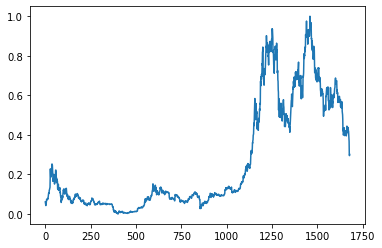

In [6]:
pyplot.plot(X)
pyplot.show()


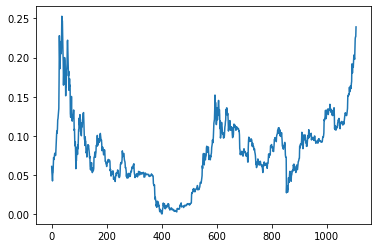

In [7]:
pyplot.plot(history)
pyplot.show()

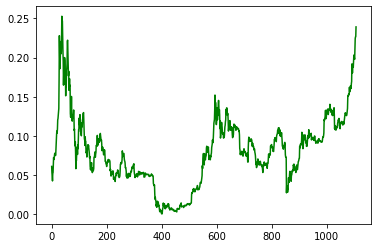

In [8]:
pyplot.plot(train, color="green")
pyplot.show()

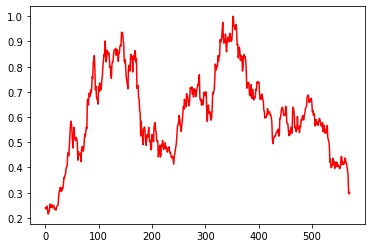

In [9]:
pyplot.plot(test, color="red")
pyplot.show()

In [ ]:

# walk-forward validation
n = len(test)
with tqdm(total=n) as pbar:
	for t in range(n):
		# model = ARIMA(history, order=(0,0,0))

		model = ARIMA(history, order=(5,1,0))

		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		pbar.write(f't={t} predicted={yhat}, expected={obs}')
		pbar.update(1)

  0%|          | 0/572 [00:00<?, ?it/s]

t=0 predicted=0.24025954638374086, expected=0.2395754360400952
t=1 predicted=0.24072688865336245, expected=0.23534365945477598
t=2 predicted=0.23542588996463784, expected=0.23525224249061708
t=3 predicted=0.23504234479900044, expected=0.24680739533789878
t=4 predicted=0.24815936903827496, expected=0.24097274023852935
t=5 predicted=0.24083867880766577, expected=0.21638862063125736
t=6 predicted=0.21557747424874407, expected=0.21573230694337192
t=7 predicted=0.21599332597598084, expected=0.22519929108891965
t=8 predicted=0.22659455515844967, expected=0.23235100626972818
t=9 predicted=0.23213166061973065, expected=0.25486538630088706
t=10 predicted=0.25315044149551075, expected=0.24207451048507947
t=11 predicted=0.24097307023611184, expected=0.24826281048598423
t=12 predicted=0.24907971461824235, expected=0.25206051588678674
t=13 predicted=0.25221139229768885, expected=0.24046977995016788
t=14 predicted=0.24259399522865482, expected=0.24753435906749716
t=15 predicted=0.2464743173114556, e

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=29 predicted=0.3210760607160349, expected=0.31473566468755465
t=30 predicted=0.31651430961952415, expected=0.30425513935485426
t=31 predicted=0.3057869295135909, expected=0.3194882538278994
t=32 predicted=0.3202419365811974, expected=0.3110678739960301
t=33 predicted=0.3116734211987566, expected=0.3187564019776668
t=34 predicted=0.31899598443425176, expected=0.33319509058416197
t=35 predicted=0.33197295396691573, expected=0.3607443563125402
t=36 predicted=0.36319925986830925, expected=0.35818346687618186
t=37 predicted=0.35702652011858954, expected=0.3708138544579994


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=38 predicted=0.37184949187619754, expected=0.3751295488410387
t=39 predicted=0.3757446290000993, expected=0.3981128241211083
t=40 predicted=0.4014714694532682, expected=0.4006119289270903
t=41 predicted=0.4004728937550261, expected=0.4064013157788473
t=42 predicted=0.40790860450969774, expected=0.44919802637119827
t=43 predicted=0.45142535134507933, expected=0.4593760954445327
t=44 predicted=0.46247943477721876, expected=0.44678308225091823
t=45 predicted=0.4475861849173893, expected=0.478191655844489
t=46 predicted=0.4805402203293346, expected=0.522213584500152
t=47 predicted=0.5280644971644486, expected=0.5618012894376457
t=48 predicted=0.5678156512612709, expected=0.5839770229001469
t=49 predicted=0.5890015695531654, expected=0.5755352082038816
t=50 predicted=0.5819964026084661, expected=0.5460294797819133
t=51 predicted=0.5483042014204803, expected=0.5026627414572198
t=52 predicted=0.49903379948487064, expected=0.47711177587730075
t=53 predicted=0.4738455744069046, expected=0.529

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=54 predicted=0.5377683394334025, expected=0.5589454732693578
t=55 predicted=0.5619426397033916, expected=0.5222291900529842
t=56 predicted=0.5121635787558109, expected=0.5121681626258912
t=57 predicted=0.5092830510839494, expected=0.5061544383619222
t=58 predicted=0.5102233747303343, expected=0.519193393890165
t=59 predicted=0.5252668960623911, expected=0.5104840988039163
t=60 predicted=0.5053614329858013, expected=0.5023688469992131
t=61 predicted=0.500902647845688, expected=0.42896536640228916
t=62 predicted=0.41890783176686625, expected=0.462854069178262
t=63 predicted=0.47090041923882053, expected=0.44827116583255894
t=64 predicted=0.44797856463239183, expected=0.4517180195436171
t=65 predicted=0.4499272520133959, expected=0.4529151840450285
t=66 predicted=0.4464696161242395, expected=0.4560778891783506
t=67 predicted=0.4589522013431378, expected=0.42285387972563615
t=68 predicted=0.4193086491958496, expected=0.4700099134547615
t=69 predicted=0.47316204631832337, expected=0.48322

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=167 predicted=0.8246648392924716, expected=0.8413806584596032
t=168 predicted=0.8451025112497801, expected=0.8638798579918981
t=169 predicted=0.8601862583611368, expected=0.8549965943886683
t=170 predicted=0.858945172763445, expected=0.8181161796185772
t=171 predicted=0.819052714102014, expected=0.831248100521863
t=172 predicted=0.8290384921777718, expected=0.7138218411613397
t=173 predicted=0.715243028489149, expected=0.722614871879322
t=174 predicted=0.7178110423584787, expected=0.7251695676721439
t=175 predicted=0.717584990321179, expected=0.6766642912039879
t=176 predicted=0.6836565132230101, expected=0.6719366588037755
t=177 predicted=0.6687231603774343, expected=0.6265683413428681
t=178 predicted=0.6234220986519415, expected=0.6168044873615364
t=179 predicted=0.6156595372152656, expected=0.524981778828997
t=180 predicted=0.5205983457075359, expected=0.5837458542634462
t=181 predicted=0.5737089816431159, expected=0.529680203949395
t=182 predicted=0.5303066803059722, expected=0.5

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=194 predicted=0.533590703606688, expected=0.55927871558042
t=195 predicted=0.5589201222107607, expected=0.5233023906006723
t=196 predicted=0.5284091867964396, expected=0.5024342445883191
t=197 predicted=0.5020519896679912, expected=0.507259700123211
t=198 predicted=0.5035148327905354, expected=0.47148060018470417
t=199 predicted=0.47215052787855033, expected=0.4701115013531593
t=200 predicted=0.46735211263733917, expected=0.5303086766023639
t=201 predicted=0.5248509237549835, expected=0.5203207584577998
t=202 predicted=0.5256584529467938, expected=0.5301419947248374
t=203 predicted=0.5330283705523362, expected=0.5024429278336693
t=204 predicted=0.5052425643903818, expected=0.5575546966854352
t=205 predicted=0.5500061431139723, expected=0.5749745012978416
t=206 predicted=0.5775664565847782, expected=0.5778937112293854


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=207 predicted=0.581096012092581, expected=0.5458836862708236
t=208 predicted=0.550847479747798, expected=0.541320367590315
t=209 predicted=0.5387315267610353, expected=0.5060917732626117
t=210 predicted=0.5064287652727957, expected=0.5034277778779691
t=211 predicted=0.49961063812241785, expected=0.5047090727040846
t=212 predicted=0.5036267183734392, expected=0.4421939263613431


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=213 predicted=0.44564603759164817, expected=0.45508007498802105


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=214 predicted=0.4492046503993055, expected=0.4740038419838799
t=215 predicted=0.4708403113105156, expected=0.48860681394908106
t=216 predicted=0.48848281020455725, expected=0.4415890138426111
t=217 predicted=0.4482691364180906, expected=0.4501153231955533
t=218 predicted=0.4468714724786278, expected=0.4884079494139629
t=219 predicted=0.4845384357855575, expected=0.48506101374642746


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=220 predicted=0.4863677069053299, expected=0.5073436179209311
t=221 predicted=0.5081907266530598, expected=0.49448895364889706
t=222 predicted=0.4980261584489796, expected=0.47165796913343094
t=223 predicted=0.47268420901023817, expected=0.4767089461594461
t=224 predicted=0.4748710533352564, expected=0.48870178314997414
t=225 predicted=0.48662695796318484, expected=0.49832767675763
t=226 predicted=0.49817987725989205, expected=0.47436100876115167
t=227 predicted=0.47753822009083413, expected=0.48196540641808416
t=228 predicted=0.4805096807379666, expected=0.47606043524797675
t=229 predicted=0.4762246158362465, expected=0.46085825863161645
t=230 predicted=0.4609953266737997, expected=0.4751694614086519
t=231 predicted=0.47334057437702054, expected=0.47085589229545355
t=232 predicted=0.47125453483142443, expected=0.48204300912827686
t=233 predicted=0.4811534044853498, expected=0.46518712968766973
t=234 predicted=0.46756477211573844, expected=0.45813253933859294


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=235 predicted=0.4576805716740963, expected=0.46000292860362424
t=236 predicted=0.45907222051230917, expected=0.4438111656273186
t=237 predicted=0.444225451465206, expected=0.43822759597915945
t=238 predicted=0.4375248441505629, expected=0.43996130003241946
t=239 predicted=0.4388956895433578, expected=0.44406112772161294
t=240 predicted=0.4431677260241476, expected=0.42884307230344093
t=241 predicted=0.43025936429806805, expected=0.41313526363091907
t=242 predicted=0.4134709730780936, expected=0.44894038294447874
t=243 predicted=0.4447671615734608, expected=0.4520868449440164
t=244 predicted=0.45304165727543505, expected=0.471804612752457
t=245 predicted=0.4717181643882463, expected=0.4828553479834863
t=246 predicted=0.48474519561385265, expected=0.49929777135703396
t=247 predicted=0.4994995220331662, expected=0.5301907544871884
t=248 predicted=0.5303591138420738, expected=0.5623593245758857
t=249 predicted=0.5635885526260733, expected=0.5715146834407536


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=250 predicted=0.5752777771850831, expected=0.5717092367141944


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=251 predicted=0.5748265488530317, expected=0.6063295180914202
t=252 predicted=0.6057383872805718, expected=0.5968572511322678
t=253 predicted=0.600283750998774, expected=0.5711880598271961
t=254 predicted=0.5738121249510805, expected=0.5591726949763539
t=255 predicted=0.5588608431691552, expected=0.5428667139265957
t=256 predicted=0.5411236131375884, expected=0.5676533110277155


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=257 predicted=0.5635770694262969, expected=0.5850954006124541
t=258 predicted=0.584855875953191, expected=0.615360336143608
t=259 predicted=0.6155878412501726, expected=0.642397472562311


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=260 predicted=0.644842544076847, expected=0.6306194092697105
t=261 predicted=0.6348183621387713, expected=0.6705274227332343
t=262 predicted=0.6693151802357269, expected=0.6583966860910258
t=263 predicted=0.6622186176013328, expected=0.6585304566470151
t=264 predicted=0.658944335718145, expected=0.640415324464643
t=265 predicted=0.6421342256047583, expected=0.6927241660061632
t=266 predicted=0.6871825430203746, expected=0.6818991344322436
t=267 predicted=0.6860652788858743, expected=0.6811228037203395
t=268 predicted=0.6819612826951539, expected=0.6649170139630836
t=269 predicted=0.6675233858419203, expected=0.6445668872939649
t=270 predicted=0.6436729964773831, expected=0.646211967594857
t=271 predicted=0.6439426074184033, expected=0.6760019356775545
t=272 predicted=0.6730073889782139, expected=0.7167542277658975
t=273 predicted=0.716380466282356, expected=0.7100126896643938
t=274 predicted=0.7147671750024497, expected=0.7164818288942822
t=275 predicted=0.7178482031267011, expected=

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=291 predicted=0.685203547311396, expected=0.6662679569179871
t=292 predicted=0.6618389007475183, expected=0.6709318919449662
t=293 predicted=0.667482502525769, expected=0.6474978772926272
t=294 predicted=0.6464578374847365, expected=0.6524340897472307
t=295 predicted=0.6514289695095486, expected=0.6658308192726998
t=296 predicted=0.6647801294417345, expected=0.6487284692525371
t=297 predicted=0.6502748530623886, expected=0.6818299113574238
t=298 predicted=0.6794656996178197, expected=0.6986782612705944
t=299 predicted=0.6993573511847001, expected=0.6925693249177505
t=300 predicted=0.6947655159092361, expected=0.6845506818078176
t=301 predicted=0.6862339014014177, expected=0.7002640769039215
t=302 predicted=0.6983120335571084, expected=0.6844371923983106
t=303 predicted=0.6857138998949595, expected=0.6157847221698495
t=304 predicted=0.6195613413608163, expected=0.5823613927670509
t=305 predicted=0.579642926113749, expected=0.6271434393618313
t=306 predicted=0.6196579970208106, expecte

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=315 predicted=0.696062659869359, expected=0.6914521009233568
t=316 predicted=0.6960430269955943, expected=0.6990452042891345
t=317 predicted=0.7011340716089681, expected=0.7132368454571173
t=318 predicted=0.7142794306842156, expected=0.7505741325210188
t=319 predicted=0.7483680588368369, expected=0.810369449604296


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=320 predicted=0.8105249044854081, expected=0.7861900117357401
t=321 predicted=0.791333419165034, expected=0.7887061490614474
t=322 predicted=0.7907471465824982, expected=0.8042568092097293
t=323 predicted=0.8054692198116586, expected=0.8012000032364823
t=324 predicted=0.8009278020945961, expected=0.8433764082842532
t=325 predicted=0.8418290859135099, expected=0.8209338623737187
t=326 predicted=0.8242883621283927, expected=0.8420754395316099
t=327 predicted=0.8413256718299925, expected=0.8408384717621772
t=328 predicted=0.8428168542198252, expected=0.9072526077941417
t=329 predicted=0.903839653166939, expected=0.8963437191444975
t=330 predicted=0.9009225211499154, expected=0.9066256531910593
t=331 predicted=0.9073292506418518, expected=0.913969978541454
t=332 predicted=0.9170571594494645, expected=0.9487268844084558
t=333 predicted=0.9475674070419575, expected=0.9756325577069965
t=334 predicted=0.9767797313993947, expected=0.9168316847433011
t=335 predicted=0.9224255822906366, expecte

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=342 predicted=0.8898984080494954, expected=0.9171082734326028
t=343 predicted=0.9152007995213066, expected=0.9118365112311099
t=344 predicted=0.9108849131916772, expected=0.9029779007580352
t=345 predicted=0.9046092249769533, expected=0.8980882620739464


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=346 predicted=0.9001965892071091, expected=0.9326288154711386
t=347 predicted=0.9311587174894702, expected=0.9286438130753523
t=348 predicted=0.9291448063117347, expected=0.9050496137990006
t=349 predicted=0.9061418822957544, expected=0.8999733764228758
t=350 predicted=0.9012458272678904, expected=0.9062193623194637
t=351 predicted=0.906288636238683, expected=0.9341924068541289


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=352 predicted=0.9314870240304773, expected=1.0001
t=353 predicted=0.9971311004461069, expected=0.9908508256521527
t=354 predicted=0.9935826121287027, expected=0.9601249494534929
t=355 predicted=0.9635047396044303, expected=0.9594212422481542
t=356 predicted=0.9629561532562699, expected=0.9470783429538226
t=357 predicted=0.9490919529317465, expected=0.9519529833050339
t=358 predicted=0.9497286991745333, expected=0.9674560374088783
t=359 predicted=0.9657318099608266, expected=0.937781441117547
t=360 predicted=0.9388800079690125, expected=0.8849814800767793
t=361 predicted=0.8863791831264142, expected=0.8881956167402526
t=362 predicted=0.8876914192310265, expected=0.8349409693975108
t=363 predicted=0.8356170930769903, expected=0.8532440968778147
t=364 predicted=0.8477220589414965, expected=0.8777678891826012
t=365 predicted=0.8749546492842699, expected=0.8627404097471676
t=366 predicted=0.8622474726895761, expected=0.8247925630189568
t=367 predicted=0.8252163851975449, expected=0.844686

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=405 predicted=0.6823793766911715, expected=0.6696109456558179
t=406 predicted=0.6672365504187829, expected=0.6910685200780617
t=407 predicted=0.688166725759071, expected=0.6857585030194315
t=408 predicted=0.6859915018086403, expected=0.6719686592953807
t=409 predicted=0.6722701602906415, expected=0.6632551136694502
t=410 predicted=0.6642550167210308, expected=0.6270578820702338
t=411 predicted=0.6285298738503424, expected=0.6207144373709392
t=412 predicted=0.6199051607922376, expected=0.5957956484857119
t=413 predicted=0.5954050187204448, expected=0.5985321459329288
t=414 predicted=0.5961536120144153, expected=0.6012938430082599
t=415 predicted=0.5996305226242173, expected=0.5998895254193506
t=416 predicted=0.5985385458597271, expected=0.6141067305474203
t=417 predicted=0.6130814454520646, expected=0.6329664358380731
t=418 predicted=0.6326059195744324, expected=0.6118638422012647
t=419 predicted=0.6128085057779113, expected=0.6197626200921674
t=420 predicted=0.6202512919990896, expec

/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=430 predicted=0.5154806792151783, expected=0.5242288260853434
t=431 predicted=0.5214887043991484, expected=0.5226450749998618


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=432 predicted=0.5231545720150004, expected=0.5270926575570315


/home/green/ENV3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t=433 predicted=0.5277830530801535, expected=0.5371361363274377
t=434 predicted=0.5372469271104553, expected=0.5426366382858132
t=435 predicted=0.5426041578775063, expected=0.5392077886464077
t=436 predicted=0.5395901966204905, expected=0.5479987548165446
t=437 predicted=0.5484070256844226, expected=0.5520427182699186
t=438 predicted=0.5524740896112724, expected=0.5242129776445295
t=439 predicted=0.5250474507304159, expected=0.5273470827179918
t=440 predicted=0.5275500505732652, expected=0.5949091680740507
t=441 predicted=0.5931977475101232, expected=0.5939809716515113
t=442 predicted=0.5926082410726188, expected=0.6090791922116511
t=443 predicted=0.6087824399503972, expected=0.6312749032106573
t=444 predicted=0.6341867318749063, expected=0.6355988557850786
t=445 predicted=0.637231313852121, expected=0.6390241835487477
t=446 predicted=0.6399891189041202, expected=0.6269974029627597
t=447 predicted=0.6288460896922232, expected=0.6090093011948814
t=448 predicted=0.6102118919076653, expec

In [ ]:

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:

# plot forecasts against actual outcomes
pyplot.plot(test, color="blue")
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
diff = predictions - test
pyplot.plot(diff, color='red')
pyplot.show()

In [ ]:
diff = predictions - test

pyplot.plot(test, color="green")
pyplot.plot(predictions, color='blue')
pyplot.plot(diff, color='red')
pyplot.show()

In [ ]:
pyplot.hist(diff, bins=50)
pyplot.show()

In [ ]:
print("total diff:", sum(diff))
print('Test RMSE: %.3f' % rmse)